# Prediction and BLEU Score

### In this notebook I will :
- Prediction
- Bleu Score
- Conclusion & Future Work
### Note : Please read the conclusion at the end.

## 1. Prediction
- To Predict, we must first import data and all the necessary elements.
- Build the Prediction Function from the trained inference model.
- See the results.

### Importing Test Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
## set the file path.
test_data_path = r'C:\Users\Pratreek Sarna\Desktop\Data Science & Machine Learning Coding Ninjas\Project - Neural Machine Translation\Data_Files\Test_data.csv'
## read the csv file.
test_data = pd.read_csv(test_data_path, encoding='utf-8')
## look at the data.
test_data.sample(5)

,Source,Target
51452,il est rare que je sois invité à des fêtes,sos i do not often get invited to parties eos
18954,je veux entendre de vos nouvelles,sos i want to hear from you eos
26379,tom est un fanatique de sport,sos tom is a sports fanatic eos
54211,jai été plutôt occupé,sos i have been kind of busy eos
53401,ça ne vaut pas la peine den discuter,sos it is not worth discussing eos


### Importing Maximum Common Sequence Length
- Maximum Common Sequence Length is the maximum common length of both source and target numerical sequences.
- We need to do this because, The model has been trained on training data only, the test data needs to be adjusted accordingly.

In [3]:
## Initializing an empty variabe.
COMMON_MAXIMUM_LENGTH = None
## This file has the common_length_variable_saved.
path = r'C:\Users\Pratreek Sarna\Desktop\Data Science & Machine Learning Coding Ninjas\Project - Neural Machine Translation\Data_Files\MAXIMUM_COMMON_LENGTH.txt'
## opening the file.
with open(path) as file :
    ## assigning the variable value.
    COMMON_MAXIMUM_LENGTH = int(file.read())

In [4]:
print(COMMON_MAXIMUM_LENGTH)

55


### Importing convert_data() Function from NMT_Module.py to convert Data into numerical sequence

In [5]:
from NMT_Module import convert_data
print(convert_data.__doc__)


    This function returns the complete converted set. This function calls :
    1. text_to_num_sequences -> This function convertes text sequeces to numerical sequences and returns numerical sequences.
    2. get_pad_sequeces -> This function returns padded sequences and maximun common length.S
    


In [6]:
## getting source language sentences.
source = test_data['Source']
## getting target language sentences.
target = test_data['Target']

In [7]:
## calling convert_data()
source_sequences, target_sequences, _, _, _, _, _ = convert_data(source, target, COMMON_MAXIMUM_LENGTH)

### Looking at the Instances

#### Source Sequences

In [8]:
## source language sentences converted into numerical sequences.
source_sequences

array([[ 44,  11,  25, ...,   0,   0,   0],
       [ 18,   1, 162, ...,   0,   0,   0],
       [  2,  24,  44, ...,   0,   0,   0],
       ...,
       [  2,  41,   1, ...,   0,   0,   0],
       [  2,   1,   1, ...,   0,   0,   0],
       [107,   3,   1, ...,   0,   0,   0]])

#### Target Sequences

In [9]:
## target language sentences converted into numerical sequences.
target_sequences

array([[  2,  65,   5, ...,   0,   0,   0],
       [  2,  22,  28, ...,   0,   0,   0],
       [  2,   4,  24, ...,   0,   0,   0],
       ...,
       [  2,   4,  32, ...,   0,   0,   0],
       [  2,   4, 390, ...,   0,   0,   0],
       [  2,  25,   8, ...,   0,   0,   0]])

#### Max Common Sequence Length

In [10]:
## This common maximum sequence length is of trained model.
COMMON_MAXIMUM_LENGTH

55

### Importing Source Word Index and Target Word Index Dictionary

In [11]:
import json

#### Loading the Json file and saving dictionary

In [12]:
## creating empty variables.
source_word_index = None
Target_word_index = None
## defining path of the files.
## Note : the files are of Json type, since we saved a dictionary.
source_word_index_path = r'C:\Users\Pratreek Sarna\Desktop\Data Science & Machine Learning Coding Ninjas\Project - Neural Machine Translation\Data_Files\source_word_index.json'
target_word_index_path = r'C:\Users\Pratreek Sarna\Desktop\Data Science & Machine Learning Coding Ninjas\Project - Neural Machine Translation\Data_Files\target_word_index.json'
## opening source json file.
with open(source_word_index_path) as source_file :
    ## saving the dictionary.
    source_word_index = json.load(source_file)
## opening the target json file.
with open(target_word_index_path) as target_file :
    ## saving the dictionary.
    Target_word_index = json.load(target_file)

#### Source word index

In [13]:
source_word_index

{'<UKN>': 1,
 'je': 2,
 'de': 3,
 'pas': 4,
 'que': 5,
 'ne': 6,
 'à': 7,
 'le': 8,
 'la': 9,
 'vous': 10,
 'tom': 11,
 'il': 12,
 'est': 13,
 'tu': 14,
 'un': 15,
 'ce': 16,
 'a': 17,
 'nous': 18,
 'les': 19,
 'une': 20,
 'en': 21,
 'jai': 22,
 'suis': 23,
 'me': 24,
 'pour': 25,
 'ça': 26,
 'faire': 27,
 'cest': 28,
 'dans': 29,
 'plus': 30,
 'des': 31,
 'elle': 32,
 'qui': 33,
 'tout': 34,
 'te': 35,
 'fait': 36,
 'du': 37,
 'ma': 38,
 'veux': 39,
 'avec': 40,
 'mon': 41,
 'se': 42,
 'au': 43,
 'si': 44,
 'et': 45,
 'sont': 46,
 'cette': 47,
 'y': 48,
 'quil': 49,
 'cela': 50,
 'très': 51,
 'pense': 52,
 'nest': 53,
 'son': 54,
 'sur': 55,
 'pourquoi': 56,
 'moi': 57,
 'dit': 58,
 'temps': 59,
 'sais': 60,
 'votre': 61,
 'peux': 62,
 'être': 63,
 'été': 64,
 'était': 65,
 'ici': 66,
 'chose': 67,
 'nai': 68,
 'ils': 69,
 'jamais': 70,
 'lui': 71,
 'bien': 72,
 'comment': 73,
 'où': 74,
 'estce': 75,
 'ton': 76,
 'vraiment': 77,
 'quelque': 78,
 'on': 79,
 'beaucoup': 80,
 'dire': 81

#### Target Word Index

In [14]:
Target_word_index

{'<UKN>': 1,
 'sos': 2,
 'eos': 3,
 'i': 4,
 'you': 5,
 'to': 6,
 'the': 7,
 'is': 8,
 'not': 9,
 'a': 10,
 'do': 11,
 'that': 12,
 'tom': 13,
 'are': 14,
 'it': 15,
 'have': 16,
 'of': 17,
 'he': 18,
 'this': 19,
 'in': 20,
 'we': 21,
 'me': 22,
 'was': 23,
 'am': 24,
 'what': 25,
 'my': 26,
 'will': 27,
 'for': 28,
 'did': 29,
 'your': 30,
 'be': 31,
 'want': 32,
 'know': 33,
 'on': 34,
 'like': 35,
 'she': 36,
 'would': 37,
 'with': 38,
 'can': 39,
 'they': 40,
 'think': 41,
 'how': 42,
 'at': 43,
 'all': 44,
 'his': 45,
 'go': 46,
 'there': 47,
 'and': 48,
 'here': 49,
 'about': 50,
 'cannot': 51,
 'time': 52,
 'get': 53,
 'him': 54,
 'were': 55,
 'us': 56,
 'very': 57,
 'going': 58,
 'no': 59,
 'why': 60,
 'as': 61,
 'had': 62,
 'up': 63,
 'one': 64,
 'has': 65,
 'could': 66,
 'out': 67,
 'just': 68,
 'if': 69,
 'need': 70,
 'should': 71,
 'her': 72,
 'who': 73,
 'good': 74,
 'does': 75,
 'so': 76,
 'let': 77,
 'mary': 78,
 'when': 79,
 'an': 80,
 'help': 81,
 'tell': 82,
 'come':

### Importing the Trained Models

In [15]:
from keras.models import load_model
from tensorflow.keras.utils import  plot_model

### Loading Encoder

In [16]:
encoder_model = load_model(r'C:\Users\Pratreek Sarna\Desktop\Data Science & Machine Learning Coding Ninjas\Project - Neural Machine Translation\Data_Files\encoder_model.keras')

#### Summary

In [17]:
encoder_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 embedding (Embedding)       (None, None, 100)            150100    ['input_1[0][0]']             
                                                                                                  
 bidirectional (Bidirection  [(None, 64),                 34048     ['embedding[0][0]']           
 al)                          (None, 32),                                                         
                              (None, 32),                                                         
                              (None, 32),                                                   

#### Plot

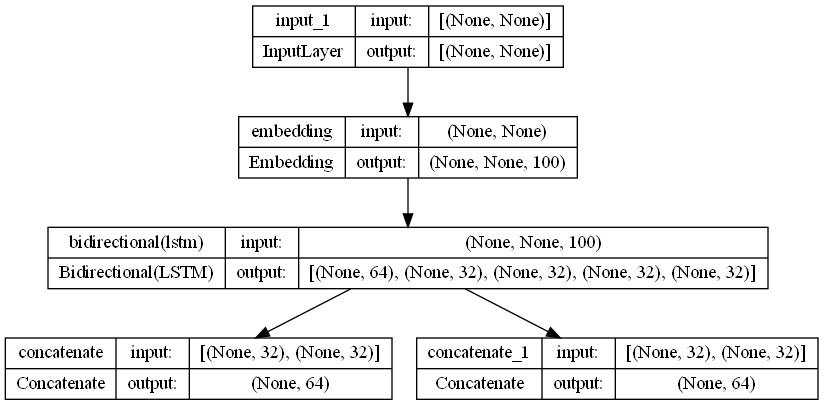

In [18]:
plot_model(encoder_model,show_shapes=True, to_file=r"C:\Users\Pratreek Sarna\Desktop\Data Science & Machine Learning Coding Ninjas\Project - Neural Machine Translation\Data_Files\encoder_model_architecture.png")

### Loading Decoder

In [19]:
decoder_model = load_model(r'C:\Users\Pratreek Sarna\Desktop\Data Science & Machine Learning Coding Ninjas\Project - Neural Machine Translation\Data_Files\decoder_model.keras')

#### Summary

In [20]:
decoder_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, None, 100)            150100    ['input_2[0][0]']             
                                                                                                  
 input_3 (InputLayer)        [(None, 64)]                 0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 64)]                 0         []                            
                                                                                            

#### Plot

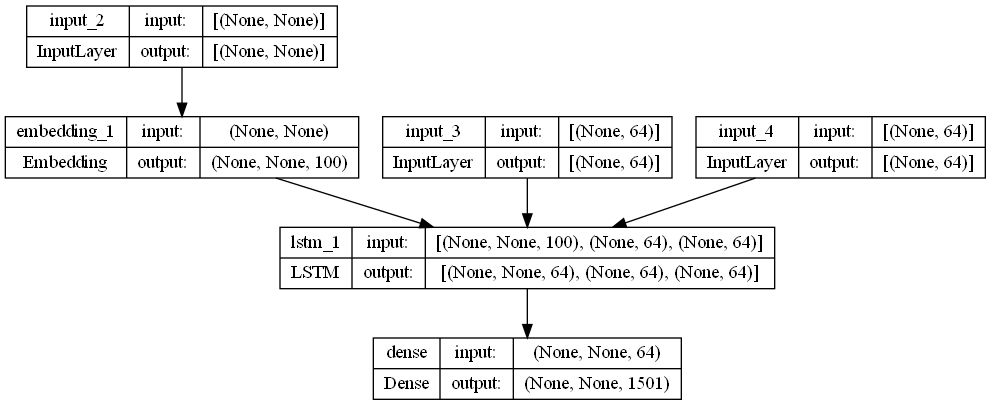

In [21]:
plot_model(decoder_model,show_shapes=True, to_file=r"C:\Users\Pratreek Sarna\Desktop\Data Science & Machine Learning Coding Ninjas\Project - Neural Machine Translation\Data_Files\decoder_model_architecture.png")

### Re-Clean the Target Sentences
- Remove 'sos' and 'eos' token.

In [22]:
def reclean_target(sent) :
    
    '''
    This function removes 'sos' and 'eos' from the sentences.
    '''
    
    new_sent = sent.split()[1: -2]
    return ' '.join(new_sent)

In [23]:
test_data['Target'] = test_data['Target'].apply(reclean_target)
test_data.sample(5)

,Source,Target
314,faites une pause,take a
53661,tom va probablement vouloir rester jusqu’à lundi,tom will probably want to stay until
50791,il ny eut pas de réponse,no answer was
29091,jaimerais pouvoir trouver comment faire pour q...,i wish i could figure out how to get more peop...
10401,je suis en route pour rendre visite à une amie...,i am on my way to visit a friend in the


### Prediction Function Definition

In [24]:
def predicted_translation(input_seq, encoder_model, decoder_model, Target_word_index, COMMON_MAXIMUM_LENGTH):
    
    '''
    This function predicts the target output from the given input sequence.
    '''
    
    ## Predict the context vector from the encoder.
    state_values = encoder_model.predict(np.expand_dims(input_seq, axis=0)) ## coverting the 1D sequence to 2D.
    
    # Define the initial target sequence with the 'sos' token.
    target_numerical_sequence = np.zeros((1,1))
    target_numerical_sequence[0][0] = Target_word_index['sos']
    
    ## define seq_len, which will work as an iterator
    seq_len = 1
    
    ## initialize the final output string
    final_translated_output = ''
    
    ## boolean variable to terminate the loop
    stop_condition = False
    first = True
    
    while not stop_condition:
        
        ## Predict the next sequence and the context vector.
        output_tokens, h, c = decoder_model.predict([target_numerical_sequence] + list(state_values))
        
        # Get the predicted numerical.
        predicted_word_index = np.argmax(output_tokens[0, -1, :])
        
        # Get the word from this predicted numerical.
        predicted_word = list(Target_word_index.keys())[list(Target_word_index.values()).index(predicted_word_index)]
        
        ## terminating condition.
        if (predicted_word == 'eos' or seq_len > COMMON_MAXIMUM_LENGTH):
            stop_condition = True
            break
        
        ## add the word to the output string.
        if first :
            final_translated_output += predicted_word
            first = False
        else :
            final_translated_output += ' ' + predicted_word
        
        # Update the target sequence by appending the predicted_word_index.
        target_numerical_sequence[0, 0] = predicted_word_index
        seq_len += 1
        
        # Update states.
        state_values = [h, c]
        
    return final_translated_output

### Predicting Samples

In [25]:
## initialize an empty list.
predicted_sentences = list()
## iterate first 10 sentences.
for itr in range(10) :
    ## predict the results and append it to the list.
        predicted_sentences.append(predicted_translation(source_sequences[itr], encoder_model, decoder_model, Target_word_index, COMMON_MAXIMUM_LENGTH))

1/1 [==============================] - 0s 17ms/step


### Results

In [26]:
## iterate the predicted sentences.
for itr in range(10) :
    print('Source :', source[itr])
    print('Actual Target :', test_data['Target'][itr])
    print('Predicted Target :', predicted_sentences[itr])
    print()

Source : si vous me donnez un livre je le lirai
Actual Target : if you give me a book i will read
Predicted Target : if tom will i want to be a <UKN>

Source : nous partirons demain si le temps le permet
Actual Target : we will leave tomorrow weather
Predicted Target : we are going to see him that <UKN>

Source : je suis si heureux que je mélève dans le ciel
Actual Target : i am so happy i feel like i could
Predicted Target : i feel so i can put my <UKN>

Source : arrêtezvous ici 
Actual Target : pull over
Predicted Target : let us go there

Source : moïse descendit de la montagne en portant les commandements divins
Actual Target : moses came down from the mountain bearing divine
Predicted Target : <UKN> <UKN> <UKN> <UKN> <UKN> <UKN>

Source : je te suis reconnaissant pour ton temps
Actual Target : i appreciate your
Predicted Target : i will be able to <UKN> you

Source : que proposestu 
Actual Target : what do you
Predicted Target : what are you <UKN>

Source : vous avez vraiment beau

## 2. BLEU Score

BLEU (Bilingual Evaluation Understudy) is a metric used for evaluating the quality of machine-translated text by comparing it to one or more reference translations. It is widely used in natural language processing tasks, including machine translation.

### Components of BLEU Score
BLEU is based on precision at the n-gram level. The score is computed using the following components:

#### 1. N-gram Precision
- BLEU considers precision at different n-gram levels (unigrams, bigrams, etc.).
- Precision at each level is calculated by comparing the number of overlapping n-grams in the candidate (predicted) translation with the reference translation.

#### 2. Modified Precision
- Modified precision is used to handle the issue of short translations receiving inflated scores.
- It involves brevity penalty to penalize shorter translations.

#### 3. BLEU Score Calculation
- The overall BLEU score is calculated by combining the modified precision scores at different n-gram levels using a weighted geometric mean.
- The weights are typically set to favor shorter n-grams.

#### Implementation
- Import sentence_bleu() from NLTK
- Calculate BLEU Score.

In [27]:
from nltk.translate.bleu_score import sentence_bleu
import warnings
warnings.filterwarnings("ignore")

### Function to compute BLEU score

In [28]:
def compute_bleu(actual_target_tokens, predicted_target_tokens):
    return sentence_bleu([actual_target_tokens], predicted_target_tokens)

### BLEU scores for the predicted samples

In [29]:
# Stroring Bleu Scores for the first 10 predicted sentences.
## initialize a list.
bleu_scores = list()
## iterate first 10 predicted sentences.
for itr in range(10):
    actual_target = test_data['Target'][itr]
    predicted_target = predicted_sentences[itr]

    # Tokenize the actual and predicted sentences
    actual_target_tokens = actual_target.split()
    predicted_target_tokens = predicted_target.split()

    # Compute BLEU score
    bleu_score = compute_bleu(actual_target_tokens, predicted_target_tokens)
    bleu_scores.append(bleu_score)

### Plotting the BLEU Score

In [30]:
import matplotlib.pyplot as plt

In [31]:
def plot_bleu_scores(bleu_scores):
    '''
    This function plots the Bleu Score
    '''
    
    ## create the epochs array.
    epochs = np.arange(1, len(bleu_scores) + 1)

    # Plotting
    plt.figure(figsize=(6, 3))
    plt.plot(epochs, bleu_scores, linestyle='-', marker='o', color='b', label='BLEU Score')
    
    # Add labels and title
    plt.title('BLEU Score Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('BLEU Score')
    
    # Add grid and legend
    plt.grid(True)
    plt.legend()
    
    # Show the plot
    plt.show()

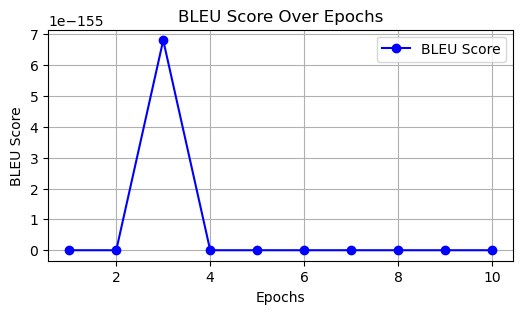

<Figure size 640x480 with 0 Axes>

In [32]:
plot_bleu_scores(bleu_scores)
## saving the plot
plt.savefig(r'C:\Users\Pratreek Sarna\Desktop\Data Science & Machine Learning Coding Ninjas\Project - Neural Machine Translation\Data_Files\Bleu_score.png')

## 3. Conclusion & Future Work
#### Conclusion
- I have created a NMT_Module.py file, which has all the functions required in the project.
- I have followed a basic Encoder - Decoder Architecture to create the model.
- The model has been trained on less parameters, 1500 words, 10 epochs, 64 and 128 units in LSTM.
- The model has an accuracy of 70%.
#### Future Work
The future work is to :
- Create an Attention Model.
- use distributed training, to build a large model and train the model on large set of parameters.
- Use Mlops Concepts like data pipelining and Deploying the model.
- Create a WebApp using Streamlit.

### Submitted By - Prateek Sarna